#### Nathan Cobb, Helina Mulugeta, Matthew Schultz
#### CSC 3310 141
#### Dr. William S. Retert
#### October 2, 2025

# Program 1: Iterative Algorithms

# Introduction

TODO

## Problem Statement


## Decision Rule



# Imports

In [1]:
import math
import time

import numpy as np
from scipy.stats import linregress

from polygenerator import random_polygon
import matplotlib.pyplot as plt
import pandas as pd
import random

# The Algorithm

## Psuedocode

## Correctness


In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def magnitude(self):
        return math.sqrt(self.x**2 + self.y**2)

class Polygon:
    def __init__(self, points: list[Point]):
        self.points = points

    def __init__(self, points: list[(float, float)]):
        self.points = [Point(pt[0], pt[1]) for pt in points]

    def xs(self):
        return [pt.x for pt in self.points]
    
    def ys(self):
        return [pt.y for pt in self.points]
    
    def as_list(self):
        return [(pt.x, pt.y) for pt in self.points]
    

In [3]:
def check_point(point, polygon):
    left_intersections = 0
    for i in range(len(polygon)):
        p0 = polygon[i]
        p1 = polygon[(i + 1) % len(polygon)]
        if p0.y == p1.y:
            # print(1,polygon[0])
            continue
        if p0.y == point.y and p0.x <= point.x:
            left_intersections += 1
            # print(2,polygon[0])
            if ((polygon[(i-1)%len(polygon)]).y - point.y)*(p1.y-point.y) > 0:
                # print(3, polygon[0])
                left_intersections += 1
            continue

        if min(p0.y, p1.y) < point.y < max(p0.y, p1.y):
            x_intersect = ((point.y - p0.y)*(p0.x - p1.x)/(p0.y-p1.y))+p0.x
            if x_intersect < point.x:
                # print(4, polygon[0])
                left_intersections += 1
    return left_intersections % 2 == 1

# Testing the Algorithm

## Test Case Table

- Describe input, answer expected, and answer obtained
TODO

[(0.9734494809665812, 0.5044018089174103), (1.0, 0.5754454570131741), (0.9750755992274706, 0.7839881029296787), (0.8667566849019022, 1.0), (0.2591858330182011, 0.8584185960626126), (0.0, 0.7294175230160561), (0.09041362180573262, 0.4256277735265314), (0.23923738200218378, 0.16793274260133578), (0.1633750794501985, 0.6742705353870262), (0.5569840793883578, 0.5963797926697523), (0.23959738359585528, 0.7452350854399937), (0.39083872614802295, 0.7887202654732589), (0.33658120686620235, 0.7852460242212715), (0.7053275186955397, 0.8194834950567462), (0.46476412719249116, 0.7446417245204916), (0.8704052690239993, 0.5305509173206161), (0.6943932218589606, 0.20934453061544972), (0.4320195443551537, 0.0), (0.7599147055952186, 0.12445643488131185), (0.9123823017165801, 0.5360406846917416)]


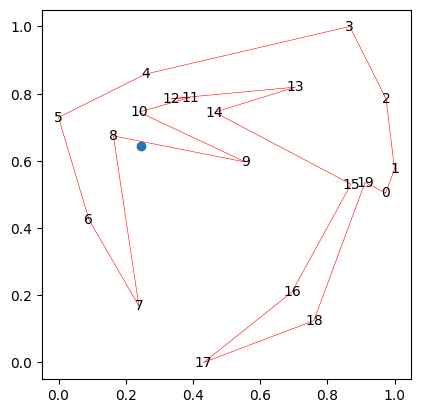

In [4]:
# Referenced: https://pypi.org/project/polygenerator/
def plot_polygon(point: Point, polygon):
    plt.figure()
    plt.gca().set_aspect("equal")

    for i, pt in enumerate(polygon.as_list()):
        plt.text(pt[0], pt[1], str(i), horizontalalignment="center", verticalalignment="center")

    # just so that it is plotted as closed polygon
    polygon.points.append(polygon.points[0])

    plt.plot(polygon.xs(), polygon.ys(), "r-", linewidth=0.4)
    plt.scatter(point.x, point.y)
    plt.show()

polygon = Polygon(random_polygon(num_points=20))

print(polygon.as_list())

plot_polygon(Point(random.random(),random.random()), polygon)

In [5]:
def generate_point_polygon_pairs(base: int, add: int, rep: int, num: int):
    '''
    Generates num point polygon pairs that have a starting number of sides
    of base and go up by add with rep number of pairs that have the same 
    number of sides

    Args:
        base (int): the initial number of sides for the polygon. Has to be >= 3, will default to 3 otherwise
        add (int): how many sides to add for each polygon going up
        rep (int): how many times the same number of sides polygon should be generated
        num (int): how many polygons to generate

    Returns: 
        list: list of (point, polygon) tuples
    '''
    if base < 3:
        base = 3

    out_list = []
    rep_count = 0

    while len(out_list) < num:
        polygon = Polygon(random_polygon(num_points=base))
        point = Point(random.random(),random.random())
        out_list.append((point, polygon))
        rep_count += 1

        if rep_count == rep:
            base += add
            rep_count = 0

    return out_list
    

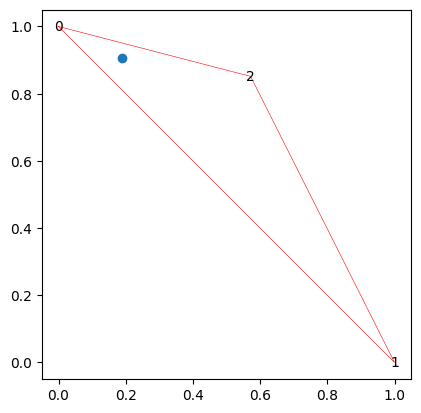

True


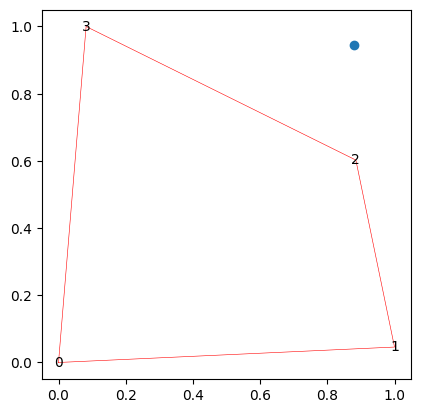

False


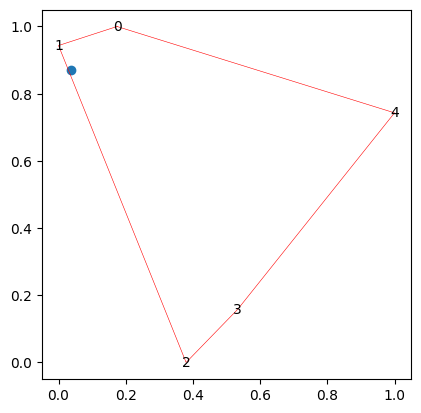

True


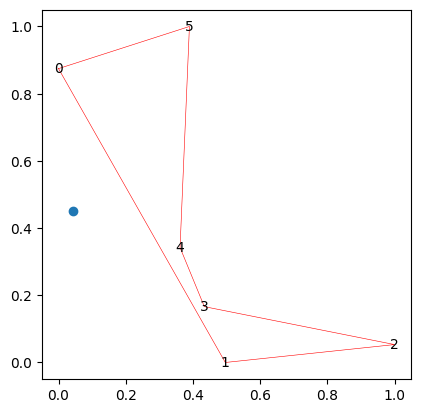

False


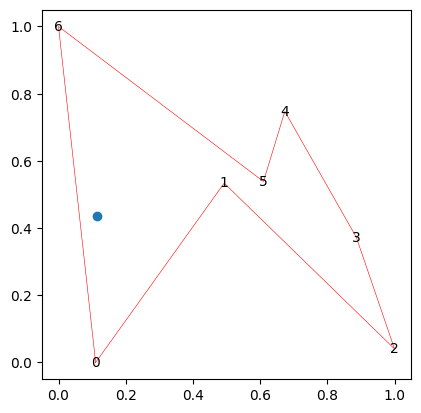

True


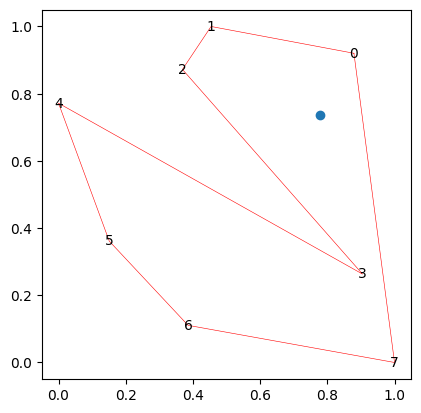

True


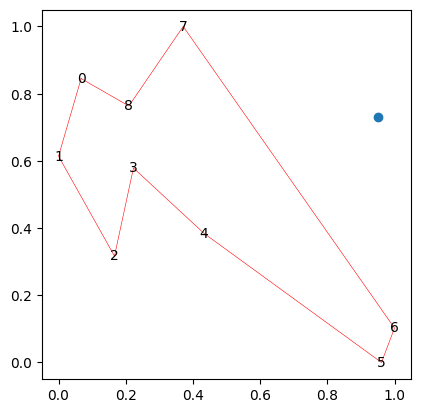

False


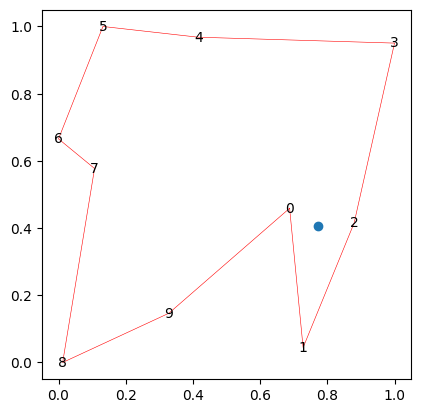

True


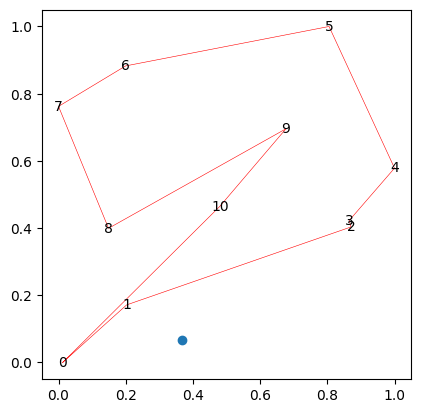

False


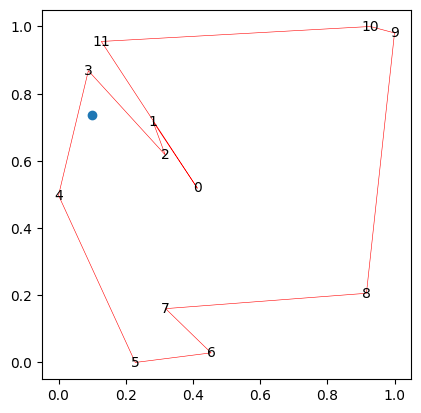

True


In [6]:
paris = generate_point_polygon_pairs(3, 1, 1, 10)

for (point, polygon) in paris:
    plot_polygon(point, polygon)
    print(check_point(point, polygon.points))

In [7]:
import tests
import os.path

test_list = tests.read_tests(os.getcwd()+"/../testfile.json")
tests.create_test_table(test_list)

,point,polygon,inside,point_count,test_success
0,"(2.0, 2.0)","[(1.0, 9.0), (8.0, 3.0), (0.0, -6.0), (-4.0, 2...",1,4,1
1,"(2.0, 2.0)","[(1.0, 9.0), (8.0, 3.0), (0.0, 6.0), (-4.0, 2.0)]",0,4,1
2,"(2, 2)","[(1.5, 3.0), (1.0, 9.0), (8.0, 3.0), (0.0, -6....",1,6,1
3,"(0, 0)","[(1, 0), (0, 1), (-1, 0), (0, -1)]",1,4,1
4,"(-2, 0)","[(-2, 0), (-1, 0), (0, 1), (0, -1)]",0,4,1
5,"(-1.5, 0)","[(-2, 0), (-1, 0), (0, 1), (0, -1)]",0,4,1
6,"(-1, 0)","[(-2, 0), (-1, 0), (0, 1), (0, -1)]",0,4,1
7,"(-4, 2)","[(1.5, 3.0), (1.0, 9.0), (8.0, 3.0), (0.0, -6....",0,6,1


# Benchmarking

In [8]:
def benchmark(algorithm, point, polygon):
    '''
        takes a the algorithm to solve the problem, a point and
        a polygon to use for running it.

        TODO: Should I be making a copy of either input?

        Returns: 
            float: the time elapsed in seconds
    '''
    start_time = time.perf_counter()
    algorithm(point, polygon)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

In [9]:
pairs = generate_point_polygon_pairs(5, 10, 1, 20)

# results are recorded as (polygon sides, time taken)
results = {
    "num_sides" : [],
    "run_time" : []
}

for point, polygon in pairs:
    results["num_sides"].append(len(polygon.points))
    results["run_time"].append(benchmark(check_point, point, polygon.points))

resutls_df = pd.DataFrame(results)
resutls_df.head()

,num_sides,run_time
0,5,0.000008
1,15,0.000008
2,25,0.000013
3,35,0.000022
4,45,0.000034


Text(0, 0.5, 'Run Time(s)')

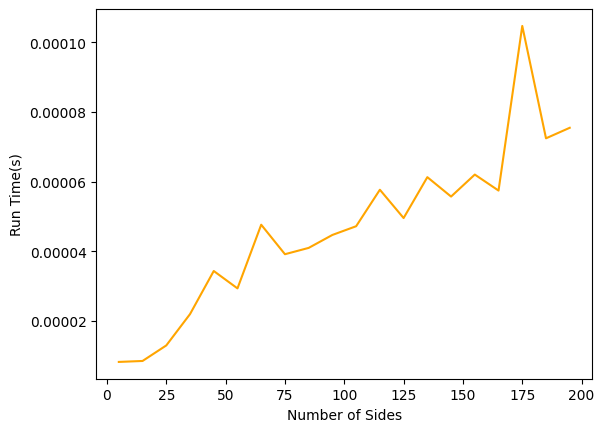

In [10]:
plt.plot(results["num_sides"], results["run_time"], color="orange")

plt.xlabel("Number of Sides")
plt.ylabel("Run Time(s)")

In [11]:
m, b, _, _, _ = linregress(np.log(resutls_df.num_sides), np.log(resutls_df.run_time))
m # implies linear time

np.float64(0.7023139354171359)